<a href="https://colab.research.google.com/github/mohMujeeb/Python/blob/main/Neural_Network_For_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
#Lets check data of first image in data set
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

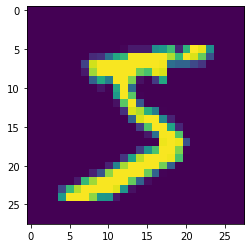

In [ ]:
#Lets Visualize the Image Know!!
plt.imshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
#the dataset is in 2D form as 
X_train.shape


(60000, 28, 28)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#lets convert it into single dimensional array
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)




In [ ]:
#Lets check data in dataset in single Dimensional Array

X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#lets create a simple NN
model = keras.Sequential([ 
       keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4665 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9258


In [ ]:
model.evaluate(X_test_flatten , y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2697 - accuracy: 0.9251


[0.26970401406288147, 0.9251000285148621]

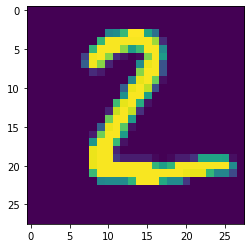

In [ ]:

plt.imshow(X_test[1])

In [ ]:
y_predict = model.predict(X_test_flatten)
y_predict[1]

313/313 [==============================] - 1s 2ms/step


array([3.6557481e-01, 5.1067378e-03, 9.9890798e-01, 2.7842066e-01,
       5.8998217e-10, 7.7781808e-01, 9.0762168e-01, 6.5916153e-13,
       1.8649681e-01, 1.4368053e-09], dtype=float32)

In [ ]:
np.argmax(y_predict[1])

2

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    2,    0,    5,    9,    3,    4,    0],
       [   0, 1113,    4,    1,    0,    1,    4,    2,   10,    0],
       [   3,    9,  921,   16,   11,    3,   12,   10,   45,    2],
       [   3,    0,   24,  908,    0,   23,    3,   14,   30,    5],
       [   1,    1,    2,    1,  923,    0,   12,    4,   11,   27],
       [   9,    3,    1,   30,   12,  765,   16,    9,   42,    5],
       [   7,    3,    5,    1,    7,    9,  920,    2,    4,    0],
       [   1,    7,   26,    4,    9,    0,    0,  958,    2,   21],
       [   5,    8,    5,   16,    9,   15,    9,   13,  891,    3],
       [   9,    7,    1,    8,   35,    6,    0,   33,   14,  896]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

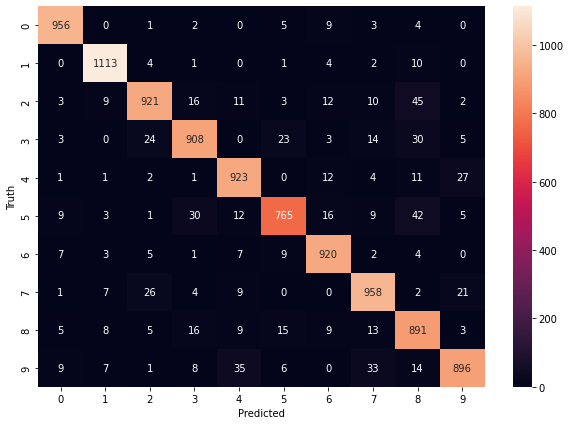

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#Lets Add an Hidden Layer in it
model = keras.Sequential([ 
       keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
       keras.layers.Dense(10, activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2710 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1223 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0856 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0643 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9844


In [ ]:
model.evaluate(X_test_flatten , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9762


[0.07907356321811676, 0.9761999845504761]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

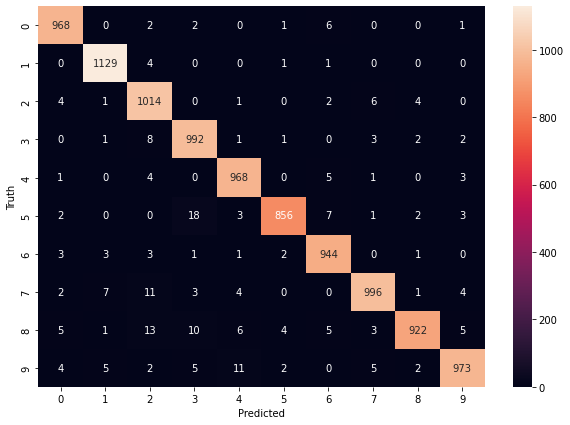

In [ ]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels= y_test , predictions= y_predicted_labels)


import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#We can simply creat a Flatten layer so there will be no need for flatten array

model = keras.Sequential([ 
       keras.layers.Flatten(input_shape=(28,28)),
       keras.layers.Dense(100, activation = 'relu'),
       keras.layers.Dense(10, activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2729 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1271 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0688 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - accuracy: 0.9831
